<a href="https://colab.research.google.com/github/siddhantjain07/DeepLearning/blob/master/VectorizedFeedForwardNetowrks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
from tqdm.notebook import tqdm
import seaborn as sns 
import imageio
import time 
from IPython.display import HTML

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

In [15]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

In [16]:
np.random.seed(0)

In [17]:
sns.set()

#Testing Vectorization

In [ ]:
N = 100
M = 200
a = np.random.randn(N, M)
b = np.random.randn(N, M)
c = np.zeros((N, M))

In [ ]:
#magic command for ipython ntbks, used to count time for excecution of a particular cell
%%time
for i in range(N):
  for j in range(M):
    c[i, j] = a[i, j] * b[i, j]

CPU times: user 21.1 ms, sys: 835 µs, total: 22 ms
Wall time: 24 ms


In [ ]:
%%time 
c = a * b

CPU times: user 442 µs, sys: 0 ns, total: 442 µs
Wall time: 275 µs


In [ ]:
%%time 
for i in range(N):
  for j in range(M):
    c[i, j] = np.sin(a[i, j])

CPU times: user 48.8 ms, sys: 705 µs, total: 49.5 ms
Wall time: 50.2 ms


In [ ]:
%%time
c = np.sin(a)

CPU times: user 541 µs, sys: 697 µs, total: 1.24 ms
Wall time: 1.2 ms


#Generating Data


In [ ]:
data, labels = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


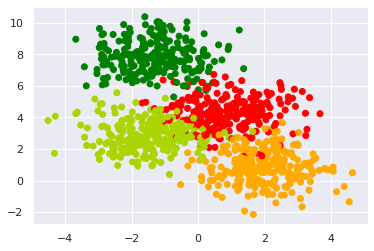

In [ ]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [ ]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

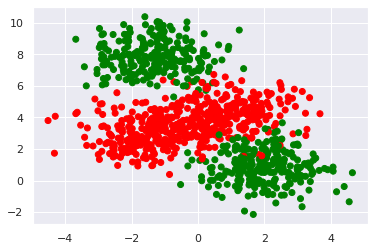

In [ ]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

#Multi-Class Classification

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels_orig,  stratify=labels_orig, random_state=0)
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape, labels_orig.shape)

(750, 2) (250, 2) (750,) (250,) (1000,)


In [ ]:
enc = OneHotEncoder()
# 0 -> [1 0 0 0] , 1 -> [0 1 0 0] , 2 -> [0 0 1 0] , 3 -> [0 0 0 1]
Y_OH_train = enc.fit_transform(np.expand_dims(Y_train,1)).toarray()
Y_OH_val = enc.fit_transform(np.expand_dims(Y_val, 1)).toarray()
print(Y_OH_train.shape, Y_OH_val.shape)

(750, 4) (250, 4)


In [ ]:
W1 = np.random.randn(2,2)
W2 = np.random.randn(4,2)
print(W1)
print(W2)

[[-1.93950036  0.73885045]
 [ 1.39468453 -0.81358502]]
[[-0.818822   -0.1027978 ]
 [ 1.23934523  0.3642774 ]
 [-1.16663743 -0.50382808]
 [ 0.11141039 -1.53470286]]


#Scalar Version

In [ ]:
class FF_MultiClass_Scalar:

  def __init__(self, W1, W2):
    self.w1 = W1[0][0].copy()
    self.w2 = W1[0][1].copy()
    self.w3 = W1[1][0].copy()
    self.w4 = W1[1][1].copy()
    self.w5 = W2[0][0].copy()
    self.w6 = W2[0][1].copy()
    self.w7 = W2[1][0].copy()
    self.w8 = W2[1][1].copy()
    self.w9 = W2[2][0].copy()
    self.w10 = W2[2][1].copy()
    self.w11 = W2[3][0].copy()
    self.w12 = W2[3][1].copy()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
    self.b4 = 0
    self.b5 = 0
    self.b6 = 0




  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))



  def forward_pass(self, x):
    #input layer
    self.x1, self.x2 = x

    #hidden layer
    self.z1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.a1 = self.sigmoid(self.z1)
    self.z2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.a2 = self.sigmoid(self.z2)

    #Output layer
    self.z3 = self.w5*self.a1 + self.w6*self.a2 + self.b3
    self.z4 = self.w7*self.a1 + self.w8*self.a2 + self.b4
    self.z5 = self.w9*self.a1 + self.w10*self.a2 + self.b5
    self.z6 = self.w11*self.a1 + self.w12*self.a2 + self.b6
    sum_exps = np.sum([np.exp(self.z3), np.exp(self.z4), np.exp(self.z5), np.exp(self.z6)])
    self.a3 = np.exp(self.z3) / sum_exps
    self.a4 = np.exp(self.z4) / sum_exps
    self.a5 = np.exp(self.z5) / sum_exps
    self.a6 = np.exp(self.z6) / sum_exps

    return np.array([self.a3, self.a4, self.a5, self.a6])



  def grad(self, x, y):
    self.forward_pass(x)
    self.y1, self.y2, self.y3, self.y4 = y

    self.dz3 = (self.a3 - self.y1)
    self.dz4 = (self.a4 - self.y2)
    self.dz5 = (self.a5 - self.y3)
    self.dz6 = (self.a6 - self.y4)

    self.dw5 = self.dz3 * self.a1
    self.dw6 = self.dz3 * self.a2
    self.db3 = self.dz3

    self.dw7 = self.dz4 * self.a1
    self.dw8 = self.dz4 * self.a2
    self.db4 = self.dz4

    self.dw9 = self.dz5 * self.a1
    self.dw10 = self.dz5 * self.a2
    self.db5 = self.dz5

    self.dw11 = self.dz6 * self.a1
    self.dw12 = self.dz6 * self.a2
    self.db6 = self.dz6

    self.da1 = self.dz3*self.w5 + self.dz4*self.w7 + self.dz5*self.w9 + self.dz6*self.w11
    self.da2 = self.dz3*self.w6 + self.dz4*self.w8 + self.dz5*self.w10 + self.dz6*self.w12

    self.dz1 = self.da1 * self.a1 * (1 - self.a1)
    self.dz2 = self.da2 * self.a2 * (1 - self.a2)

    self.dw1 = self.dz1 * self.x1
    self.dw2 = self.dz1 * self.x2
    self.db1 = self.dz1

    self.dw3 = self.dz2 * self.x1
    self.dw4 = self.dz2 * self.x2
    self.db2 = self.dz2



  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False, display_weight=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, dw7, dw8, dw9, dw10, dw11, dw12, db1, db2, db3, db4, db5, db6  = [0]*18
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        dw7 += self.dw7
        dw8 += self.dw8
        dw9 += self.dw9
        dw10 += self.dw10
        dw11 += self.dw11
        dw12 += self.dw12
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        db4 += self.db4
        db2 += self.db5
        db3 += self.db6
        
      m = X.shape[0]
      self.w1 -= (learning_rate * (dw1 / m))
      self.w2 -= (learning_rate * (dw2 / m))
      self.w3 -= (learning_rate * (dw3 / m))
      self.w4 -= (learning_rate * (dw4 / m))
      self.w5 -= (learning_rate * (dw5 / m))
      self.w6 -= (learning_rate * (dw6 / m))
      self.w7 -= (learning_rate * (dw7 / m))
      self.w8 -= (learning_rate * (dw8 / m))
      self.w9 -= (learning_rate * (dw9 / m))
      self.w10 -= (learning_rate * (dw10 / m))
      self.w11 -= (learning_rate * (dw11 / m))
      self.w12 -= (learning_rate * (dw12 / m))
      self.b1 -= (learning_rate * (db1 / m))
      self.b2 -= (learning_rate * (db2 / m))
      self.b3 -= (learning_rate * (db3 / m))
      self.b4 -= (learning_rate * (db4 / m))
      self.b5 -= (learning_rate * (db5 / m))
      self.b6 -= (learning_rate * (db6 / m))
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
    
    if display_loss:
      Wt1 = [[self.w1, self.w3], [self.w2, self.w4]]
      Wt2 = [[self.w5, self.w6, self.w7, self.w8], [self.w9, self.w10, self.w11, self.w12]]
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      


  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)


#Weight Vectorized Version


In [ ]:
class FF_MultiClass_WeightsVectorized:

  def __init__(self, W1, W2):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros((2,1))
    self.B2 = np.zeros((4,1))

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def softmax(self, x):
    exps = np.exp(x)
    return exps / np.sum(exps)

  def forward_pass(self, x):
    x = x.reshape(-1, 1)                                          # i/p shape -> (2 , 1)    -> column vector 
    self.Z1 = np.matmul(self.W1, x) + self.B1                     #  (2 , 2) * (2 , 1) + (2 , 1) -> (2 , 1)
    self.A1 = self.sigmoid(self.Z1)                               # g(2 , 1)                     -> (2 , 1)
    self.Z2 = np.matmul(self.W2, self.A1) + self.B2               #  (4 , 2) * (2 , 1) + (4 , 1) -> (4 , 1)
    self.A2 = self.softmax(self.Z2)                               # g(4 , 1)                     -> (4 , 1)
    return (self.A2).reshape(1,4)
    
  def grad_sigmoid(self, x):
    return x*(1-x)

  def grad(self, x, y):
    self.forward_pass(x)
    x = x.reshape(-1, 1)                                          # (2 , 1)
    y = y.reshape(-1, 1)                                          # (4 , 1)

    self.dZ2 = self.A2 - y                                        # (4 , 1) - (4 , 1) -> (4 , 1)

    self.dW2 = np.matmul(self.dZ2, self.A1.T)                               # dZ2 (4 , 1) , A1 (2 , 1) -> A1.T (1 , 2)    --->   (4 , 1)*(1 , 2)  -> (4 , 2)
    self.dB2 = self.dZ2                                           # dZ2 -> (4 , 1)
    self.dA1 = np.matmul(self.W2.T, self.dZ2)                     # W2 (4 , 2) -> W2.T (2 , 4) , dZ2 (4 , 1)    --->   (2 , 4)*(4 , 1)  -> (2 , 1) <- dA1 
    self.dZ1 = np.multiply(self.dA1, self.grad_sigmoid(self.A1))  # (2 , 1)

    self.dW1 = np.matmul(x, self.dZ1.T)                           # x (2 , 1) , dZ1 (2 , 1) -> dZ1.T (1 , 2)    --->   (2 , 1)*(1 , 2)  -> (2 , 2) <- dW1
    self.dB1 = self.dZ1                                           # (2 , 1)

  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm(range(epochs), total=epochs, unit="epoch"):
      dW1 = np.zeros((2,2))
      dW2 = np.zeros((4,2))
      dB1 = np.zeros((2,1))
      dB2 = np.zeros((4,1))
      for x, y in zip(X, Y):
        self.grad(x, y)
        dW1 += self.dW1
        dW2 += self.dW2
        dB1 += self.dB1
        dB2 += self.dB2  
        
      m = X.shape[0]
      self.W2 = self.W2 - learning_rate * (dW2/m)
      self.B2 = self.B2 - learning_rate * (dB2/m)
      self.W1 = self.W1 - learning_rate * (dW1/m)
      self.B1 = self.B1 - learning_rate * (dB1/m)

      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
        
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()

In [ ]:
class FF_MultiClass_InputWeightsVectorized:

  def __init__(self, W1, W2):
    self.W1 = W1.copy()
    self.W2 = W2.copy()
    self.B1 = np.zeros((2,1))
    self.B2 = np.zeros((4,1))

  def sigmoid(self, X):
    return 1.0/(1.0 + np.exp(-X))
  
  def softmax(self, X):
    exps = np.exp(X)
    return exps / np.sum(exps, axis=0)

  def forward_pass(self, X):
    # i/p shape -> (2 , N)    -> column vectors for each example 
    X = X.T
    self.Z1 = np.matmul(self.W1, X) + self.B1                     #  (2 , 2) * (2 , N) + (2 , N) -> (2 , N)
    self.A1 = self.sigmoid(self.Z1)                               # g(2 , N)                     -> (2 , N)
    self.Z2 = np.matmul(self.W2, self.A1) + self.B2               #  (4 , 2) * (2 , N) + (4 , N) -> (4 , N)
    self.A2 = self.softmax(self.Z2)                               # g(4 , N)                     -> (4 , N)
    return self.A2.T
    
  def grad_sigmoid(self, X):
    return X*(1-X)

  def grad(self, X, Y):
    self.forward_pass(X)
    X = X.T    # (2 , N)  ->   Input 
    Y = Y.T    # (4 , N)  ->   output

    self.dZ2 = self.A2 - Y                                        # (4 , N) - (4 , N) -> (4 , N)

    self.dW2 = np.matmul(self.dZ2, self.A1.T)                     # dZ2 (4 , N) , A1 (2 , N) -> A1.T (N , 2)    --->   (4 , N)*(N , 2)  -> (4 , 2)
    self.dB2 = np.sum(self.dZ2, axis=1).reshape(-1,1)             # dZ2 (4 , N) -> (4 , 1)
    self.dA1 = np.matmul(self.W2.T, self.dZ2)                     # W2 (4 , 2) -> W2.T (2 , 4) , dZ2 (4 , 1)    --->   (2 , 4)*(4 , 1)  -> (2 , 1) <- dA1 
    self.dZ1 = np.multiply(self.dA1, self.grad_sigmoid(self.A1))  # (2 , N)

    self.dW1 = np.matmul(X, self.dZ1.T)                           # x (2 , N) , dZ1 (2 , N) -> dZ1.T (N , 2)    --->   (2 , N)*(N , 2)  -> (2 , 2) <- dW1
    self.dB1 = np.sum(self.dZ1, axis=1).reshape(-1,1)             # (2 , N) -> (2 , 1)
 
  def fit(self, X, Y, epochs=1, learning_rate=1, display_loss=False):
      
    if display_loss:
      loss = {}
    
    for i in tqdm(range(epochs), total=epochs, unit="epoch"):
      self.grad(X, Y) # X -> (2, N), Y -> (4, N)
        
      m = X.shape[0]
      self.W2 -= learning_rate * (self.dW2/m)
      self.B2 -= learning_rate * (self.dB2/m)
      self.W1 -= learning_rate * (self.dW1/m)
      self.B1 -= learning_rate * (self.dB1/m)

      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = log_loss(np.argmax(Y, axis=1), Y_pred)
    
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('Log Loss')
      plt.show()
      
  
  def predict(self, X):
    Y_pred = self.forward_pass(X)
    return np.array(Y_pred).squeeze()

In [ ]:
print(X_train.shape, X_val.shape, Y_OH_train.shape, Y_OH_val.shape)

(750, 2) (250, 2) (750, 4) (250, 4)


In [ ]:
#X_train = X_train.T
#X_val = X_val.T
#Y_OH_train = Y_OH_train.T
#Y_OH_val = Y_OH_val.T

In [ ]:
print(X_train.shape, X_val.shape, Y_OH_train.shape, Y_OH_val.shape)

(750, 2) (250, 2) (750, 4) (250, 4)


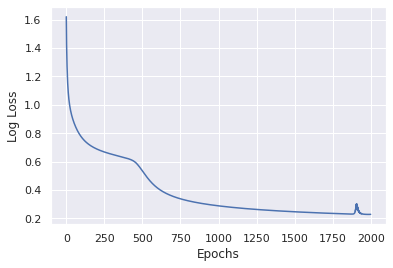

Time taken by model 1 : 124.91296768188477


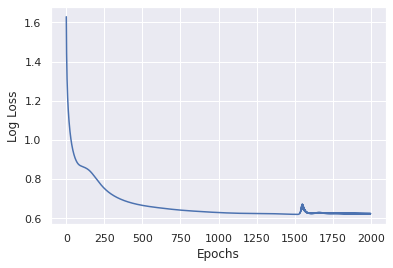

Time taken by model 2 : 87.95269703865051


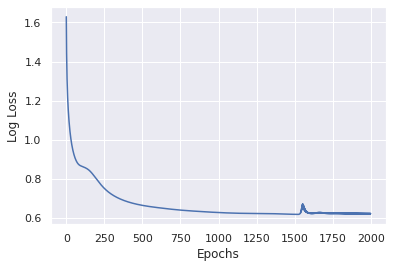

Time taken by model 3 : 3.1764473915100098


In [ ]:
models_init = [FF_MultiClass_Scalar(W1, W2), FF_MultiClass_WeightsVectorized(W1,W2), FF_MultiClass_InputWeightsVectorized(W1,W2)]
models = []

for idx, model in enumerate(models_init, start=1):
  tic = time.time()
  ffsn_multi_specific = model
  ffsn_multi_specific.fit(X_train, Y_OH_train, epochs=2000, learning_rate=0.5, display_loss=True)
  models.append(ffsn_multi_specific)
  toc = time.time()
  print("Time taken by model {} : {}".format(idx, toc-tic))

In [ ]:
for idx, model in enumerate(models, start=1):
  Y_pred_train = model.predict(X_train)
  Y_pred_train = np.argmax(Y_pred_train, 1)

  Y_pred_val = model.predict(X_val)
  Y_pred_val = np.argmax(Y_pred_val, 1)

  accuracy_train = accuracy_score(Y_pred_train, Y_train)
  accuracy_val = accuracy_score(Y_pred_val, Y_val)

  print("Model {}".format(idx))
  print("Training accuracy", round(accuracy_train, 2))
  print("Validation accuracy", round(accuracy_val, 2))

Model 1
Training accuracy 0.92
Validation accuracy 0.93
Model 2
Training accuracy 0.69
Validation accuracy 0.69
Model 3
Training accuracy 0.69
Validation accuracy 0.69


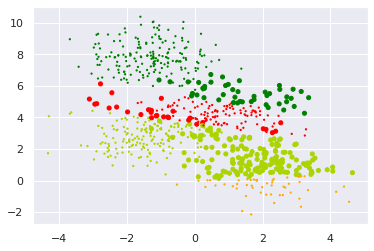

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c=Y_pred_train, cmap=my_cmap, s=15*(np.abs(np.sign(Y_pred_train-Y_train))+.1))
plt.show()

## Exercises

1. Replicate this vectorisation for the simple first network we saw earlier

2. Extend this vectorisation for the generic feed forward class that we wrote with number of hidden layers and neurons per hidden layer as inputs

3. Understand how the speedup changes as you increase the hidden layers - Keep the number of neurons per layer constant and increase the layers to see how the speed up changes

In [18]:
data, labels = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


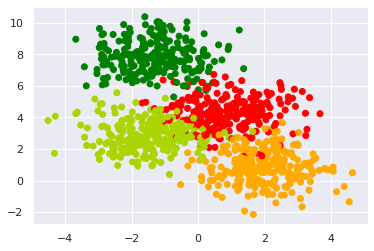

In [19]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [20]:
old_labels = labels
labels = np.mod(old_labels, 2)

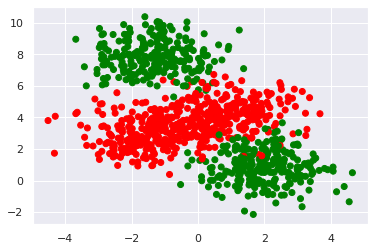

In [21]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [22]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(750, 2) (250, 2) (750,) (250,)


In [23]:
class Initial_Network_Vectorized:

  def __init__(self):
    self.W1 = np.random.randn(2, 2)
    self.W2 = np.random.randn(1, 2)
    self.B1 = np.zeros((2, 1))
    self.B2 = np.zeros((1, 1))

  def sigmoid(self, X):
    return 1.0/(1.0 + np.exp(-X))

  def forward_pass(self, X):
    # X -> (N,2) --> X.T -> (2,N)
    X = X.T
    self.Z1 = np.matmul(self.W1, X) + self.B1                         # (2 , 2) * (2 , N) --> (2 , N)
    self.A1 = self.sigmoid(self.Z1)                                   # (2 , N) --> (2 , N)
    self.Z2 = np.matmul(self.W2, self.A1) + self.B2                   # (1 , 2) * (2 , N) --> (1 , N)
    self.A2 = self.sigmoid(self.A2)
    return self.A2

  def grad(self, X, Y):
    self.forward_pass(X)
    X = X.T     # (2 , N)
    Y = Y.T     # ()

    self.dZ2 = (self.A2 - Y) * self.A2 * (1 - self.A2)                # (1 , N)

    self.dW2 = np.matmul(self.dZ2, self.A1.T)                         # (1 , N) * (N , 2) --> (2 , 2)
    self.dB2 = np.sum(self.dZ2, axis=)

SyntaxError: ignored

In [34]:
class Generic_FF_Network:

  def __init__(self, n_inputs, n_outputs, hidden_layers=[2]):
    self.nx = n_inputs
    self.ny = n_outputs
    self.nh = len(hidden_layers)
    self.neurons = [self.nx] + hidden_layers + [self.ny]

    self.W = {}
    self.B = {}

    for i in range(self.nh + 1):
      self.W[i+1] = np.random.randn( self.neurons[i], self.neurons[i+1])
      self.B[i+1] = np.zeros((1, self.neurons[i+1]))

  def sigmoid(self, X):
    return 1.0/(1.0 + np.exp(-X))

  def softmax(self, X):
    exps = np.exp(X)
    return exps / np.sum(exps, axis=1)


  def forward_pass(self, X):
    self.Z = {}
    self.A = {}
    self.A[0] = X
    for i in range(self.nh):
      self.Z[i+1] = np.matmul(self.A[i], self.W[i+1]) + self.B[i+1]
      self.A[i+1] = self.sigmoid(self.Z[i+1])
    self.Z[self.nh+1] = np.matmul(self.A[self.nh], self.W[self.nh+1]) + self.B[self.nh+1]
    self.A[self.nh+1] = self.softmax(self.Z[self.nh+1])
    return self.A[self.nh+1]
  
  def predict(self, X):
    Y_pred = self.forward_pass(X)
    return np.array(Y_pred).squeeze()
 
  def grad_sigmoid(self, X):
    return X*(1-X) 
  
  def cross_entropy(self,label,pred):
    yl=np.multiply(pred,label)
    yl=yl[yl!=0]
    yl=-np.log(yl)
    yl=np.mean(yl)
    return yl
 
  def grad(self, X, Y):
    self.forward_pass(X)
    self.dW = {}
    self.dB = {}
    self.dA = {}
    self.dZ = {}
    L = self.nh + 1
    self.dZ[L] = (self.A[L] - Y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.A[k-1].T, self.dZ[k])
      self.dB[k] = np.sum(self.dZ[k], axis=1)
      self.dA[k-1] = np.matmul(self.dZ[k], self.W[k].T)
      self.dZ[k-1] = np.multiply(self.dA[k-1], self.grad_sigmoid(self.A[k-1])) 
    
  def fit(self, X, Y, epochs=100, initialize='True', learning_rate=0.01, display_loss=False):
      
    if display_loss:
      loss = {}
      
    if initialize:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn( self.neurons[i], self.neurons[i+1])
        self.B[i+1] = np.zeros((1, self.neurons[i+1]))
        
    for epoch in tqdm(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros(( self.neurons[i], self.neurons[i+1]))
        dB[i+1] = np.zeros((1, self.neurons[i+1]))
      
      self.grad(X, Y)
      for i in range(self.nh+1):
        dW[i+1] += self.dW[i+1]
        dB[i+1] += self.dB[i+1]
                  
      m = X.shape[0]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * (dW[i+1]/m)
        self.B[i+1] -= learning_rate * (dB[i+1]/m)
        
      if display_loss:
        Y_pred = self.predict(X) 
        loss[epoch] = self.cross_entropy(Y, Y_pred)
    
    if display_loss:
      plt.plot(list(loss.values()))
      plt.xlabel('Epochs')
      plt.ylabel('CE')
      plt.show()



In [ ]:
Net1 = Generic_FF_Network(2,1,[2,2])
Net1.fit(X_train, Y_train, epochs=1000, learning_rate=0.01, display_loss=True)